<a href="https://colab.research.google.com/github/QuantumTCode/FIRST-MLWorkshop/blob/master/MovieReviewClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

imdb = keras.datasets.imdb

(xtrain,ytrain), (xtest,ytest)=imdb.load_data(num_words=10000)

In [45]:
print("Training entries: {}, labels: {}".format(len(xtrain), len(ytrain)))
print((xtrain.shape))


Training entries: 25000, labels: 25000
(25000,)


In [0]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [47]:
decode_review(xtrain[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

In [0]:
train_data=keras.preprocessing.sequence.pad_sequences(xtrain,value=word_index["<PAD>"],padding='post',maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(xtest,value=word_index["<PAD>"],padding='post',maxlen=256)

In [78]:
vocab=10000
from keras import regularizers
model=keras.Sequential()
model.add(keras.layers.Embedding(vocab,256))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(1024,activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
global_average_pooling1d_7 ( (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1025      
Total params: 2,824,193
Trainable params: 2,824,193
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:

xval=train_data[:5000]
pxtrain=train_data[5000:]

yval=ytrain[:5000]
pytrain=ytrain[5000:]

In [81]:

training=model.fit(pxtrain,pytrain,epochs=50,batch_size=512,validation_data=(xval,yval),verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 87us/step - loss: 2.5412 - acc: 0.5940 - val_loss: 1.1322 - val_acc: 0.6134
Epoch 2/50
20000/20000 [==============================] - 1s 42us/step - loss: 0.8111 - acc: 0.7242 - val_loss: 0.6316 - val_acc: 0.7450
Epoch 3/50
20000/20000 [==============================] - 1s 42us/step - loss: 0.5452 - acc: 0.8132 - val_loss: 0.4943 - val_acc: 0.8380
Epoch 4/50
20000/20000 [==============================] - 1s 43us/step - loss: 0.4386 - acc: 0.8659 - val_loss: 0.4331 - val_acc: 0.8614
Epoch 5/50
20000/20000 [==============================] - 1s 42us/step - loss: 0.3803 - acc: 0.8905 - val_loss: 0.3986 - val_acc: 0.8724
Epoch 6/50
20000/20000 [==============================] - 1s 41us/step - loss: 0.3437 - acc: 0.9002 - val_loss: 0.3776 - val_acc: 0.8784
Epoch 7/50
20000/20000 [==============================] - 1s 42us/step - loss: 0.3153 - acc: 0.9108 - val_loss: 0.3625 - val_acc:

In [82]:
results=model.evaluate(test_data,ytest)

25000/25000 [==============================] - 2s 83us/step


In [83]:
print(results)

[0.4714404443693161, 0.85804]


In [84]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

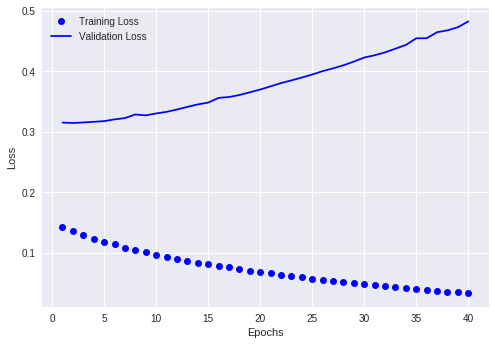

In [85]:
plt.figure()
acc=history.history['acc']
val_loss=history.history['val_loss']
loss=history.history['loss']
val_acc=history.history['val_acc']

epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.show()